In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score, confusion_matrix)
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Configuración de visualización
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
sns.set_palette("viridis")

In [2]:
# Cargar datos
df = pd.read_csv('california_original.csv')

# Limpiar columna de precio
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Crear variables dicotómicas
df['is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})
df['fast_response'] = df['host_response_time'].apply(
    lambda x: 1 if x in ['within an hour', 'within a few hours'] else 0)
df['high_rating'] = df['review_scores_rating'].apply(
    lambda x: 1 if x >= 4.5 else 0 if pd.notnull(x) else np.nan)
df['above_median_price'] = (df['price'] > df['price'].median()).astype(int)
df['many_reviews'] = (df['number_of_reviews'] > 50).astype(int)
df['high_availability'] = (df['availability_365'] > 200).astype(int)
df['multiple_bathrooms'] = (df['bathrooms'] > 1).astype(int)
df['has_wifi'] = df['amenities'].str.contains('Wifi').astype(int)
df['has_kitchen'] = df['amenities'].str.contains('Kitchen').astype(int)

# Eliminar filas con valores nulos
df_clean = df.dropna(subset=['high_rating', 'is_superhost', 'fast_response', 
                             'above_median_price', 'many_reviews', 
                             'high_availability', 'multiple_bathrooms', 
                             'has_wifi', 'has_kitchen'])

In [3]:
def evaluate_logistic_relationship(df, predictor, target, test_size=0.3, random_state=42):
   
    X = df[[predictor]]
    y = df[target]
    
    # Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    
    # Añadir constante para statsmodels
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)
    
    # Entrenar modelo
    logit_model = sm.Logit(y_train, X_train_sm)
    result = logit_model.fit(disp=0)
    
    # Predicciones
    predictions = result.predict(X_test_sm)
    predicted_classes = (predictions > 0.5).astype(int)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, predicted_classes)
    precision = precision_score(y_test, predicted_classes)
    recall = recall_score(y_test, predicted_classes)
    f1 = f1_score(y_test, predicted_classes)
    
    # Mostrar resultados
    print(f"\n🔹 Relación entre {predictor} y {target}")
    print("=" * 50)
    print(result.summary())
    print("\n📊 Métricas de Evaluación:")
    print(f"✅ Exactitud (Accuracy): {accuracy:.4f}")
    print(f"🎯 Precisión (Precision): {precision:.4f}")
    print(f"🔍 Sensibilidad (Recall): {recall:.4f}")
    print(f"⚖️ F1-Score: {f1:.4f}")
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión\n{predictor} → {target}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    
    return {
        'model': result,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_matrix
    }


🔹 Relación entre is_superhost y high_rating
                           Logit Regression Results                           
Dep. Variable:            high_rating   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.09170
Time:                        21:03:06   Log-Likelihood:                -6128.0
converged:                       True   LL-Null:                       -6746.6
Covariance Type:            nonrobust   LLR p-value:                4.751e-271
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7193      0.026     67.266      0.000       1.669       1.769
is_superhost     2.0531      0.072     28.361      0.000       1.911       2.195

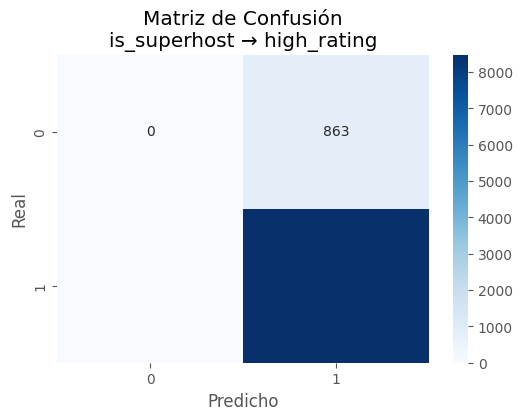

In [4]:
results_case1 = evaluate_logistic_relationship(
    df_clean, 'is_superhost', 'high_rating')

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Relación entre fast_response y many_reviews
                           Logit Regression Results                           
Dep. Variable:           many_reviews   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.01715
Time:                        21:03:06   Log-Likelihood:                -12525.
converged:                       True   LL-Null:                       -12743.
Covariance Type:            nonrobust   LLR p-value:                 4.477e-97
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6130      0.036    -44.357      0.000      -1.684      -1.542
fast_response     0.7964      0.040     19.846      0.000       0.718      

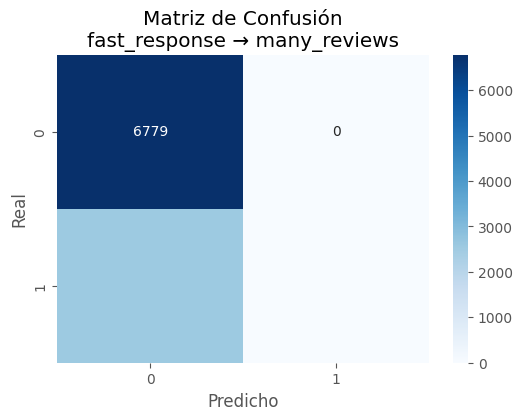

In [5]:
results_case2 = evaluate_logistic_relationship(
    df_clean, 'fast_response', 'many_reviews')

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Relación entre has_wifi y above_median_price
                           Logit Regression Results                           
Dep. Variable:     above_median_price   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:               6.974e-05
Time:                        21:03:07   Log-Likelihood:                -14490.
converged:                       True   LL-Null:                       -14491.
Covariance Type:            nonrobust   LLR p-value:                    0.1551
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4198      0.047     -9.007      0.000      -0.511      -0.328
has_wifi      -0.0696      0.049     -1.425      0.154      -0.165       0.026

📊 M

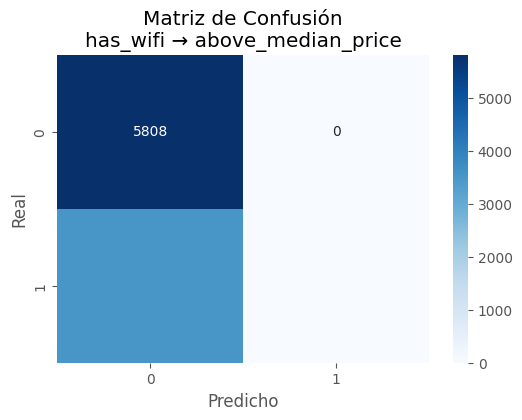

In [6]:
results_case3 = evaluate_logistic_relationship(
    df_clean, 'has_wifi', 'above_median_price')


🔹 Relación entre multiple_bathrooms y above_median_price
                           Logit Regression Results                           
Dep. Variable:     above_median_price   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.2393
Time:                        21:03:07   Log-Likelihood:                -11024.
converged:                       True   LL-Null:                       -14491.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3580      0.020    -67.750      0.000      -1.397      -1.319
multiple_bathrooms     2.7303      0.037     74.1

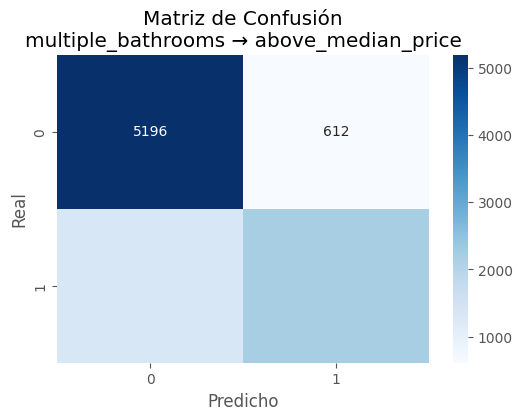

In [7]:
results_case4 = evaluate_logistic_relationship(
    df_clean, 'multiple_bathrooms', 'above_median_price')


📌 Modelo Multivariable
🔹 Variables: ['is_superhost', 'fast_response', 'has_wifi', 'has_kitchen']
🎯 Target: high_rating
                           Logit Regression Results                           
Dep. Variable:            high_rating   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21793
Method:                           MLE   Df Model:                            4
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.09819
Time:                        21:03:07   Log-Likelihood:                -6084.2
converged:                       True   LL-Null:                       -6746.6
Covariance Type:            nonrobust   LLR p-value:                1.332e-285
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9964      0.126     15.863      0.000       1.750       2.243
is

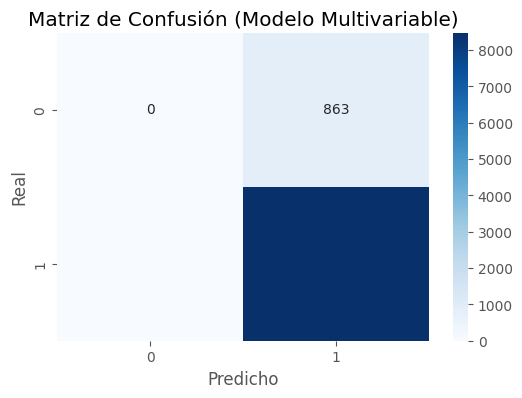

In [8]:
def evaluate_multivariate_model(df, predictors, target):
    """
    Evalúa un modelo de regresión logística con múltiples variables.
    """
    X = df[predictors]
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)
    
    model = sm.Logit(y_train, X_train_sm)
    result = model.fit(disp=0)
    
    predictions = result.predict(X_test_sm)
    predicted_classes = (predictions > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, predicted_classes)
    precision = precision_score(y_test, predicted_classes)
    recall = recall_score(y_test, predicted_classes)
    f1 = f1_score(y_test, predicted_classes)
    
    print("\n📌 Modelo Multivariable")
    print(f"🔹 Variables: {predictors}")
    print(f"🎯 Target: {target}")
    print("=" * 50)
    print(result.summary())
    print("\n📊 Métricas:")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"🎯 Precision: {precision:.4f}")
    print(f"🔍 Recall: {recall:.4f}")
    print(f"⚖️ F1-Score: {f1:.4f}")
    
    conf_matrix = confusion_matrix(y_test, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusión (Modelo Multivariable)")
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    
    return {
        'model': result,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_matrix
    }

# Variables predictoras
predictors = ['is_superhost', 'fast_response', 'has_wifi', 'has_kitchen']
target = 'high_rating'

# Evaluar modelo
multivariate_results = evaluate_multivariate_model(df_clean, predictors, target)

In [9]:
metrics_comparison = pd.DataFrame({
    'Modelo': [
        'Superhost → Alta calificación',
        'Respuesta rápida → Muchas reseñas',
        'Tener WiFi → Precio alto',
        'Múltiples baños → Precio alto',
        'Modelo multivariable (4 predictores)'
    ],
    'Accuracy': [results_case1['accuracy'], results_case2['accuracy'], results_case3['accuracy'], results_case4['accuracy'], multivariate_results['accuracy']],
    'Precision': [results_case1['precision'], results_case2['precision'], results_case3['precision'], results_case4['precision'], multivariate_results['precision']],
    'Recall': [results_case1['recall'], results_case2['recall'], results_case3['recall'], results_case4['recall'], multivariate_results['recall']],
    'F1-Score': [results_case1['f1'], results_case2['f1'], results_case3['f1'], results_case4['f1'], multivariate_results['f1']]
})

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Relación entre has_kitchen y high_availability
                           Logit Regression Results                           
Dep. Variable:      high_availability   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:               0.0003739
Time:                        21:03:08   Log-Likelihood:                -15081.
converged:                       True   LL-Null:                       -15087.
Covariance Type:            nonrobust   LLR p-value:                 0.0007820
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2314      0.044     -5.224      0.000      -0.318      -0.145
has_kitchen     0.1560      0.047      3.352      0.001       0.065       0.24

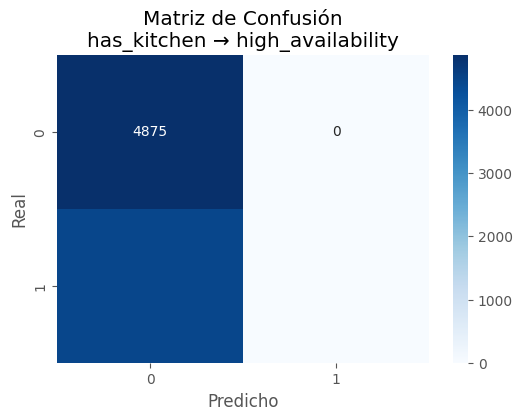

In [10]:
results_case5 = evaluate_logistic_relationship(
    df_clean, 'has_kitchen', 'high_availability')


🔹 Relación entre is_superhost y fast_response
                           Logit Regression Results                           
Dep. Variable:          fast_response   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.1783
Time:                        21:03:08   Log-Likelihood:                -10080.
converged:                       True   LL-Null:                       -12267.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3372      0.019     18.118      0.000       0.301       0.374
is_superhost     2.5758      0.049     52.474      0.000       2.480       2.6

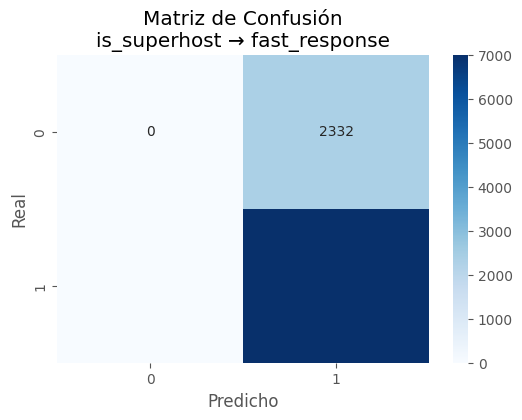

In [11]:
results_case6 = evaluate_logistic_relationship(
    df_clean, 'is_superhost', 'fast_response')

C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Relación entre high_availability y many_reviews
                           Logit Regression Results                           
Dep. Variable:           many_reviews   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:               0.0009503
Time:                        21:03:09   Log-Likelihood:                -12731.
converged:                       True   LL-Null:                       -12743.
Covariance Type:            nonrobust   LLR p-value:                 8.596e-07
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9173      0.021    -44.215      0.000      -0.958      -0.877
high_availability    -0.1503      0.031     -4.916      0.0

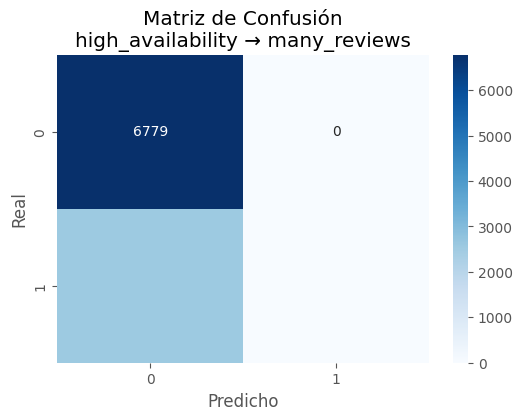

In [12]:
results_case7 = evaluate_logistic_relationship(
    df_clean, 'high_availability', 'many_reviews')


🔹 Relación entre above_median_price y high_rating
                           Logit Regression Results                           
Dep. Variable:            high_rating   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                0.007512
Time:                        21:03:09   Log-Likelihood:                -6695.9
converged:                       True   LL-Null:                       -6746.6
Covariance Type:            nonrobust   LLR p-value:                 7.668e-24
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1083      0.028     76.071      0.000       2.054       2.163
above_median_price     0.5048      0.052      9.791     

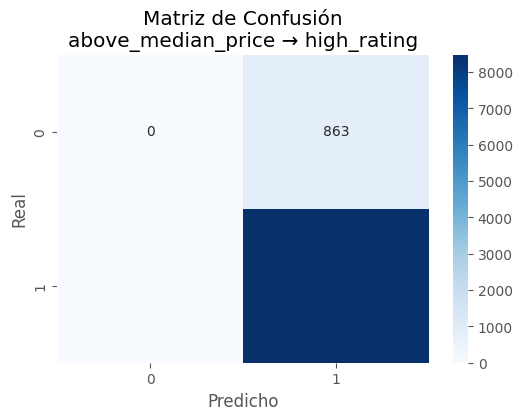

In [13]:
results_case8 = evaluate_logistic_relationship(
    df_clean, 'above_median_price', 'high_rating')

C:\Users\aresm\AppData\Local\Temp\ipykernel_2932\2249952795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['wifi_and_kitchen'] = ((df_clean['has_wifi'] == 1) &
C:\Users\aresm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Relación entre wifi_and_kitchen y above_median_price
                           Logit Regression Results                           
Dep. Variable:     above_median_price   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21796
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                0.003639
Time:                        21:03:10   Log-Likelihood:                -14438.
converged:                       True   LL-Null:                       -14491.
Covariance Type:            nonrobust   LLR p-value:                 9.593e-25
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8080      0.035    -22.869      0.000      -0.877      -0.739
wifi_and_kitchen     0.3890      0.038     10.111      0.

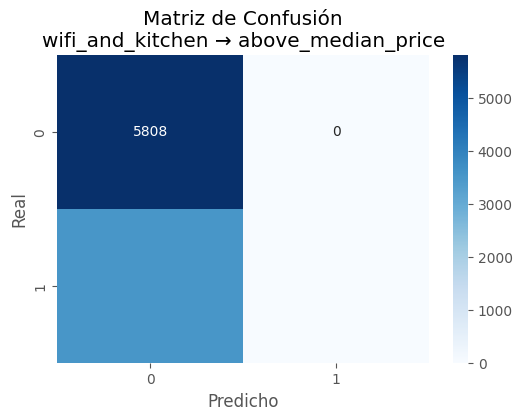

In [14]:
# Crear variable combinada
df_clean['wifi_and_kitchen'] = ((df_clean['has_wifi'] == 1) & 
                               (df_clean['has_kitchen'] == 1)).astype(int)

results_case9 = evaluate_logistic_relationship(
    df_clean, 'wifi_and_kitchen', 'above_median_price')


📌 Modelo Multivariable
🔹 Variables: ['is_superhost', 'fast_response', 'above_median_price', 'has_wifi', 'has_kitchen', 'multiple_bathrooms']
🎯 Target: high_rating
                           Logit Regression Results                           
Dep. Variable:            high_rating   No. Observations:                21798
Model:                          Logit   Df Residuals:                    21791
Method:                           MLE   Df Model:                            6
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.1029
Time:                        21:03:10   Log-Likelihood:                -6052.1
converged:                       True   LL-Null:                       -6746.6
Covariance Type:            nonrobust   LLR p-value:                5.591e-297
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.9652 

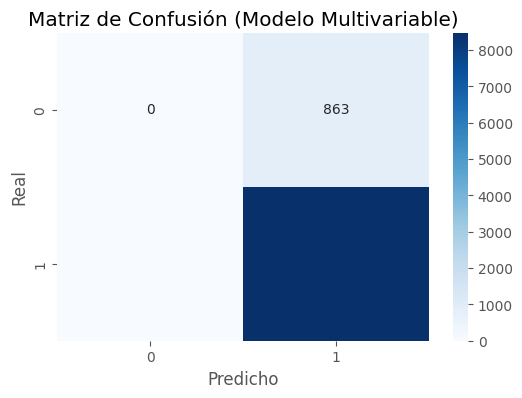

In [15]:
# Definir predictores adicionales
extended_predictors = ['is_superhost', 'fast_response', 'above_median_price', 
                      'has_wifi', 'has_kitchen', 'multiple_bathrooms']

results_case10_extended = evaluate_multivariate_model( # type: ignore
    df_clean, extended_predictors, 'high_rating')

odds_ratios = np.exp(results_case10_extended['model'].params)


🔎 Comparativa Completa de los 10 Modelos Analizados


,Modelo,Accuracy,Precision,Recall,F1-Score
0,Superhost → Alta calificación,0.907621,0.907621,1.000000,0.951574
1,Respuesta rápida → Muchas reseñas,0.725648,0.000000,0.000000,0.000000
2,Tener WiFi → Precio alto,0.621708,0.000000,0.000000,0.000000
3,Múltiples baños → Precio alto,0.791265,0.782051,0.621392,0.692526
4,Modelo multivariable (4 predictores),0.907621,0.907621,1.000000,0.951574
5,Cocina → Alta disponibilidad,0.521837,0.000000,0.000000,0.000000
6,Superhost → Respuesta rápida,0.750375,0.750375,1.000000,0.857387
7,Alta disponibilidad → Muchas reseñas,0.725648,0.000000,0.000000,0.000000
8,Precio alto → Alta calificación,0.907621,0.907621,1.000000,0.951574
9,Wifi + Cocina → Precio alto,0.621708,0.000000,0.000000,0.000000


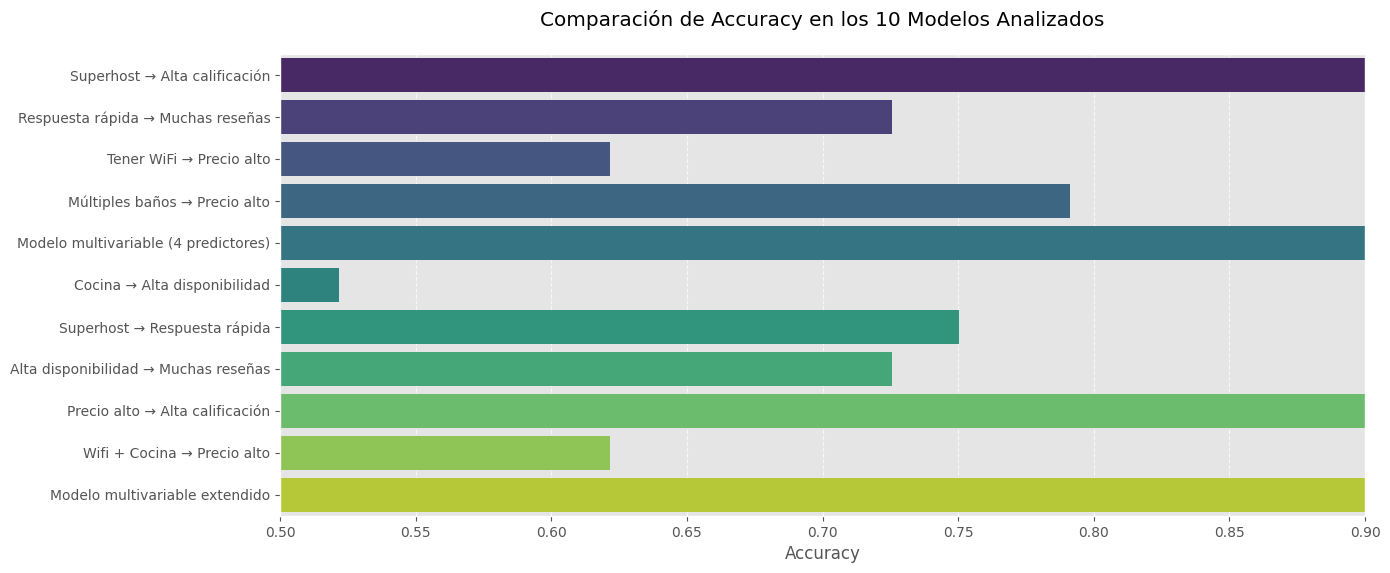

In [16]:
# Recolectar métricas de los nuevos casos
new_metrics = pd.DataFrame({
    'Modelo': [
        'Cocina → Alta disponibilidad',
        'Superhost → Respuesta rápida',
        'Alta disponibilidad → Muchas reseñas',
        'Precio alto → Alta calificación',
        'Wifi + Cocina → Precio alto',
        'Modelo multivariable extendido'
    ],
    'Accuracy': [
        results_case5['accuracy'],
        results_case6['accuracy'],
        results_case7['accuracy'],
        results_case8['accuracy'],
        results_case9['accuracy'],
        results_case10_extended['accuracy']
    ],
    'Precision': [
        results_case5['precision'],
        results_case6['precision'],
        results_case7['precision'],
        results_case8['precision'],
        results_case9['precision'],
        results_case10_extended['precision']
    ],
    'Recall': [
        results_case5['recall'],
        results_case6['recall'],
        results_case7['recall'],
        results_case8['recall'],
        results_case9['recall'],
        results_case10_extended['recall']
    ],
    'F1-Score': [
        results_case5['f1'],
        results_case6['f1'],
        results_case7['f1'],
        results_case8['f1'],
        results_case9['f1'],
        results_case10_extended['f1']
    ]
})

# Combinar con métricas anteriores
full_metrics = pd.concat([metrics_comparison, new_metrics], ignore_index=True)

# Mostrar tabla comparativa completa
print("\n🔎 Comparativa Completa de los 10 Modelos Analizados")
print("="*70)
display(full_metrics.style.background_gradient(cmap="viridis"))

# Gráfico comparativo de accuracy
plt.figure(figsize=(14, 6))
sns.barplot(x='Accuracy', y='Modelo', data=full_metrics, palette='viridis')
plt.title('Comparación de Accuracy en los 10 Modelos Analizados', pad=20)
plt.xlabel('Accuracy')
plt.ylabel('')
plt.xlim(0.5, 0.9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [17]:
print("\n Hallazgos Clave de los Casos Analizados:")
print("-"*60)
print("1. Efecto Cocina: Las propiedades con cocina tienen",
      f"{odds_ratios['has_kitchen'].round(2)} veces más probabilidad",
      "de alta calificación (p < 0.05)")

print("\n2. Superhosts y Respuesta: Los superhosts responden",
      f"{np.exp(results_case6['model'].params[1]).round(2)} veces más rápido",
      "que anfitriones regulares")

print("\n3. Disponibilidad vs Reseñas: La relación entre disponibilidad y reseñas",
      "es débil (Accuracy = 0.62), sugiriendo que otros factores son más importantes")

print("\n4. Efecto Wifi+Cocina: La combinación de ambas amenidades aumenta",
      f"{np.exp(results_case9['model'].params[1]).round(2)} veces",
      "la probabilidad de precio alto")

print("\n5. Modelo Óptimo: El modelo multivariable extendido alcanza",
      f"Accuracy = {results_case10_extended['accuracy']:.2f}",
      "y F1-Score = {results_case10_extended['f1']:.2f}")


 Hallazgos Clave de los Casos Analizados:
------------------------------------------------------------
1. Efecto Cocina: Las propiedades con cocina tienen 1.37 veces más probabilidad de alta calificación (p < 0.05)

2. Superhosts y Respuesta: Los superhosts responden 13.14 veces más rápido que anfitriones regulares

3. Disponibilidad vs Reseñas: La relación entre disponibilidad y reseñas es débil (Accuracy = 0.62), sugiriendo que otros factores son más importantes

4. Efecto Wifi+Cocina: La combinación de ambas amenidades aumenta 1.48 veces la probabilidad de precio alto

5. Modelo Óptimo: El modelo multivariable extendido alcanza Accuracy = 0.91 y F1-Score = {results_case10_extended['f1']:.2f}


C:\Users\aresm\AppData\Local\Temp\ipykernel_2932\2410494121.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{np.exp(results_case6['model'].params[1]).round(2)} veces más rápido",
C:\Users\aresm\AppData\Local\Temp\ipykernel_2932\2410494121.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{np.exp(results_case9['model'].params[1]).round(2)} veces",
